# 1 Properties of Convolusion

•	Convolution is linear

•	Convolution is shift-invariant

•	Convolution is commutative ($w\ast f = f\ast w$)

•	Convolution is associative ( $v\ast (w\ast f) = (v\ast w)\ast f$ )

•	Every linear shift-invariant operation is a convolution

# 2 Boundary conditions in practice

1. “Full convolution”: compute if any part of kernel intersects with image
2. “Same convolution”: compute if center of kernel is in image
3. “Valid convolution”: compute only if all of kernel is in image

Padding methods:

1. Clip filter (black)
2. Wrap around
3. Copy edge
4. Reflect across edge

# 3 Gaussian filter

$$
G_{\sigma}=\frac{1}{2\pi\sigma^2}\exp\{-\frac{x^2+y^2}{2\sigma^2}\}
$$
$$
GB[I]_p=\frac{1}{W_p}\sum_{q\in S}G_{\sigma_s}(||p-q||)I_q
$$

Properties of Gaussian Blur:

1. Weights independent of spatial location

2. Smooth image but too much

3. Edges are blurred

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

In [3]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'after gaussian filter k=9 std=3')

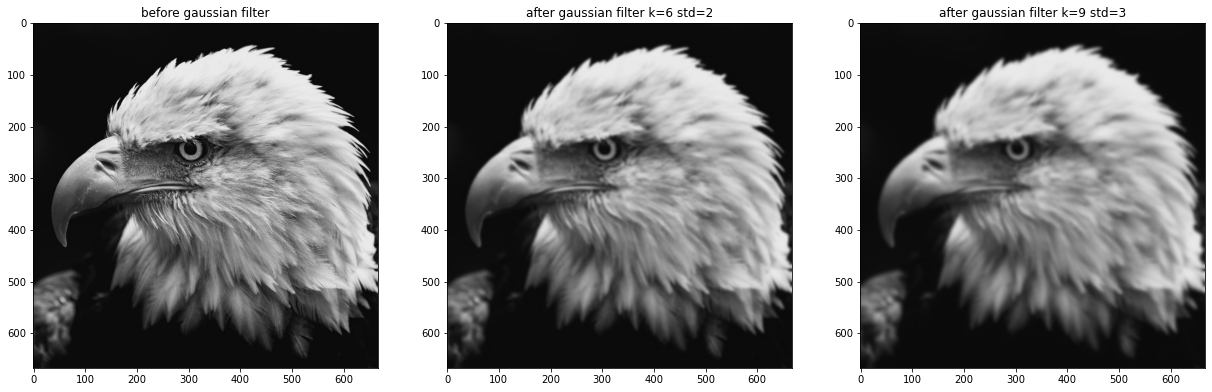

In [8]:
img_gaussian_filtered_6_2 = image_process.separable_gaussian_filter(image_process.boundary_process(img, 6, 'same', 'reflect'), 6, 2)
img_gaussian_filtered_9_3 = image_process.separable_gaussian_filter(image_process.boundary_process(img, 9, 'same', 'reflect'), 9, 3)

plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
utils.show_img(img)
plt.title('before gaussian filter')

plt.subplot(1,3,2)
utils.show_img(img_gaussian_filtered_6_2)
plt.title('after gaussian filter k=6 std=2')

plt.subplot(1,3,3)
utils.show_img(img_gaussian_filtered_9_3)
plt.title('after gaussian filter k=9 std=3')

# 4 Separable filters

$$
w\ast f=(u\ast v)\ast f=u\ast(v\ast f)
$$

•	Time complexity of original : $O(whk^2)$

•	Time complexity of separable version : $O(whk)$

# 5 Bilateral Filter

$$
BF[I]_p=\frac{1}{W_p}\sum_{q\in S}G_{\sigma_s}(||p-q||)G_{\sigma_r}(|I_p-I_q|)I_q
$$

Advantages of Bilateral Filter: Easy

Disadvantages:

1. Nonlinear

2. Complex, spatially varying kernels (Cannot be precomputed, no FFT)

3. Brute-fore implementation is slooooow!!